<a href="https://colab.research.google.com/github/Sina-Akhavi/bitcoin-timeseries-Forecasting/blob/main/arima_bitcoin_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
 pip install yfinance

In [12]:
import yfinance as yf
dataframe = yf.download(
    "BTC-USD",
    period="max",      # ← instead of the default "1mo"
    interval="1d"      # ← daily bars (this is also the default)
)

/tmp/ipython-input-2195921791.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  1 of 1 completed


In [13]:
print(dataframe.shape)
print(dataframe.head(), dataframe.tail())

(3970, 5)
Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100 Price               Close           High            Low           Open  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2025-07-26  117947.367188  118335.687500  117181.226562  117644.843750   
2025-07-27  119448.492188  119815.593750  117859.687500  117944.726562   
2025-07-28  117924.476562  119819.789062  117441.437500  119457.5234

In [14]:
close_df = dataframe[['Close']]
close_df

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-07-26,117947.367188
2025-07-27,119448.492188


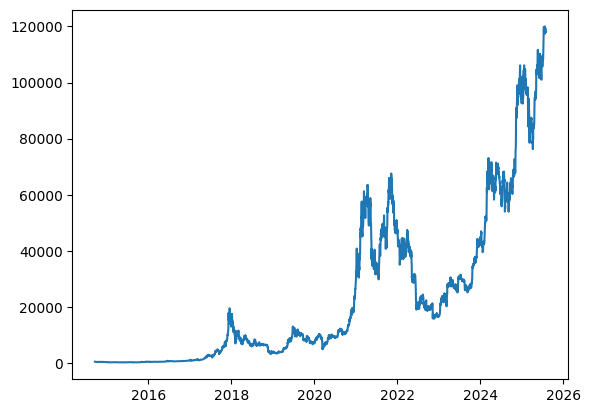

In [15]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.plot(df.index, df['Close'])
plt.show()

In [16]:
df = df[:2146]


num_training_examples = int(0.80 * len(df))
num_training_examples

training_examples = df[:num_training_examples]['Close']
test_examples = df[num_training_examples:]['Close']

test_examples

Ticker,BTC-USD
Date,
2019-05-30,8319.472656
2019-05-31,8574.501953
2019-06-01,8564.016602
2019-06-02,8742.958008
2019-06-03,8208.995117
...,...
2020-07-28,10912.823242
2020-07-29,11100.467773
2020-07-30,11111.213867


# Getting familiar with the dataset

- Training example
- start date: 2014-09-17
- end date: 2019-05-29
- number of training examples: 1716


- Test examples
- start date: 2019-05-30
- ending date: 2020-08-01
- number of testing examples: 430

In [18]:
print('training examples characteristics: \n')
print('number of training examples: ', len(training_examples))
print('start date: ', training_examples.index[0])
print('last date: ', training_examples.index[-1])

training examples characteristics: 

number of training examples:  1716
start date:  2014-09-17 00:00:00
last date:  2019-05-29 00:00:00


In [19]:
print('test examples characteristics: \n')
print('number of test examples: ', len(test_examples))
print('start date: ', test_examples.index[0])
print('last date: ', test_examples.index[-1])

test examples characteristics: 

number of test examples:  430
start date:  2019-05-30 00:00:00
last date:  2020-08-01 00:00:00


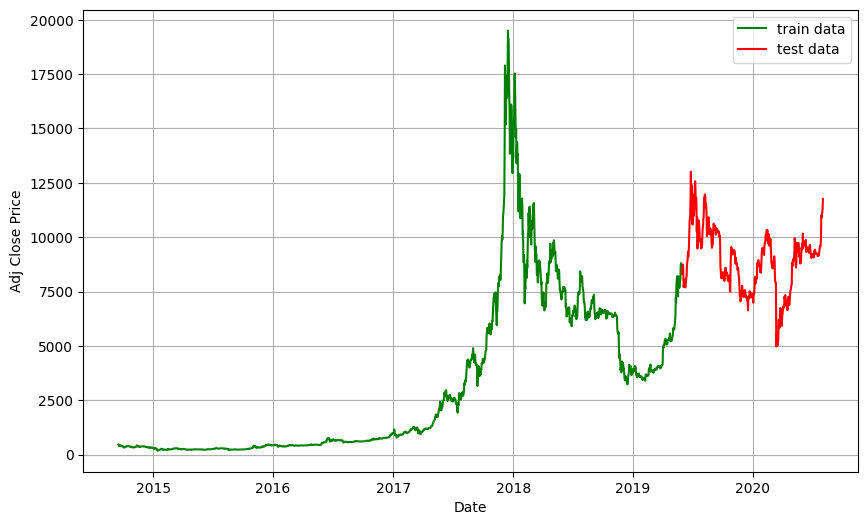

In [20]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')

plt.plot(training_examples, 'green', label='train data')
plt.plot(test_examples, 'red', label='test data')
plt.legend()

plt.show()

In [21]:
predictions = list()
history = [x for x in training_examples]
originals = list()

num_tests = len(test_examples)
for i in range(num_tests):

  model = ARIMA(history, order=(4, 1, 0))
  model_fit = model.fit()
  output = model_fit.forecast()

  pred_value = output[0]
  original_value = test_examples[i]
  history.append(original_value)

  print('predicted: ', pred_value, 'expected: ', original_value)

  predictions.append(pred_value)
  originals.append(original_value)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
print('history length=', len(history))
print('predictions length=', len(predictions))
print('originals length=', len(history))

history length= 2146
predictions length= 430
originals length= 2146


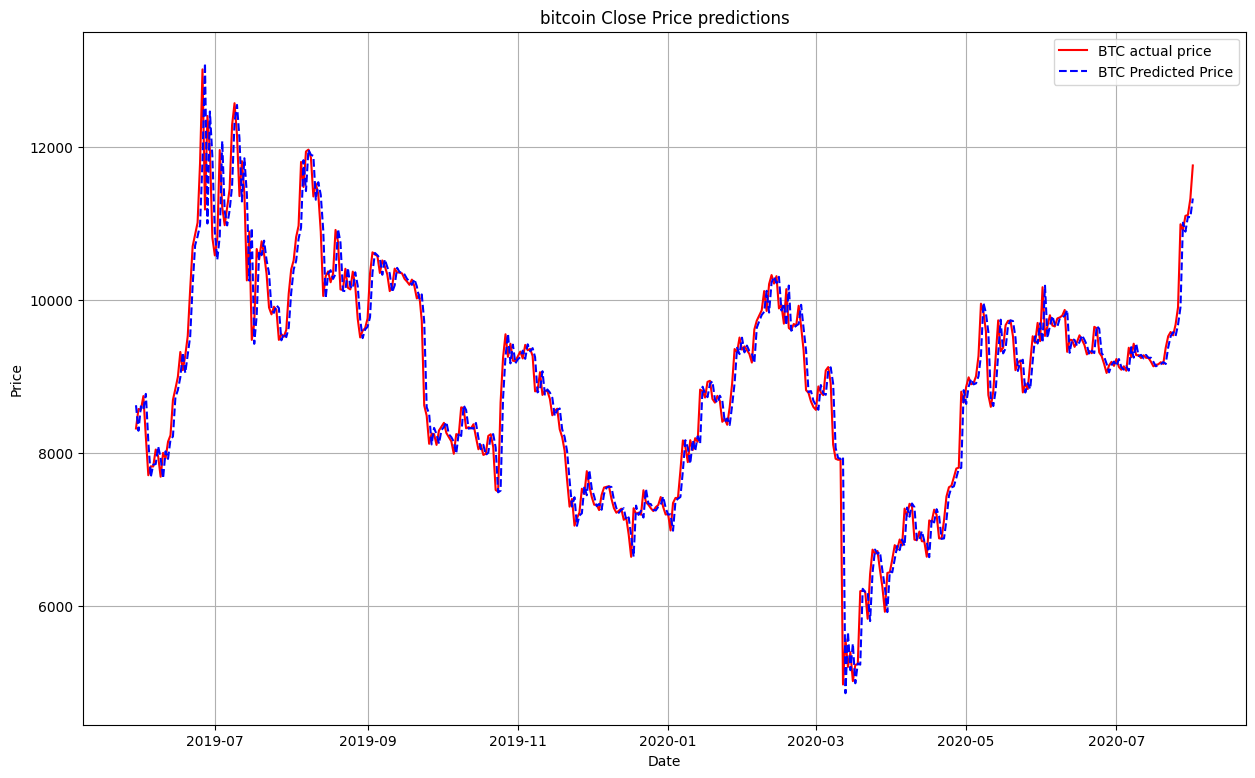

In [ ]:
# -------------------- visualizing result --------------------
plt.figure(figsize=(15, 9))
plt.grid(True)
date_range = df[num_training_examples:].index

plt.plot(date_range, originals, color='red', label='BTC actual price')
plt.plot(date_range, predictions, color = 'blue', linestyle='dashed', label='BTC Predicted Price')

plt.title('bitcoin Close Price predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import rmse


def calculate_mape(actual, predicted) -> float:

    # Convert actual and predicted
    # to numpy array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)

    # Calculate the MAPE value and return
    return round(np.mean(np.abs((
      actual - predicted) / actual)) * 100, 2)


mse = mean_squared_error(originals, predictions)
mae = mean_absolute_error(originals, predictions)
r_mse = rmse(originals, predictions)

print('MSE=', mse)
print('MAE=', mae)
print('RMSE=', r_mse)
print('MAPE=', calculate_mape(originals, predictions))


MSE= 132749.75181284643
MAE= 228.06114753843553
RMSE= 364.3483934544606
MAPE= 2.59
